In [1]:
% matplotlib inline
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

from torchvision import datasets, models, transforms, utils
import numpy as np
import matplotlib.pyplot as plt
import os

## Hyperparameters

In [42]:
batch_size = 64
G_lr = D_lr = 1e-3
global_step = 0
print_every = 1000
total_steps = 10000
cost_func = nn.BCELoss().cuda()

D_noise = 100
D_side = 28
D_img = D_side**2
D_hidden = 128

## Dataloader

In [35]:
modes = ['train', 'val']
trans = transforms.Compose([transforms.ToTensor(),]) # transforms.Normalize((0.1307,), (0.3081,))
dsets = {k: datasets.MNIST('./data', train=k=='train', download=True, transform=trans) for k in modes}
loaders = {k: torch.utils.data.DataLoader(dsets[k], batch_size=batch_size, shuffle=True) for k in modes}

def random_noise(batch_size=64):
    return Variable(torch.randn(batch_size, D_noise)).cuda()

def mnist():
    data = next(iter(loaders['train']))[0]
    return Variable(data).resize(batch_size, D_img).cuda()

## Inspect data

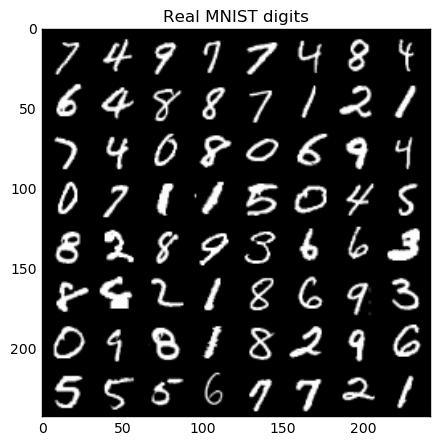

In [36]:
def imshow(inp, c, save=False, title=None):
    """Imshow for Tensor."""
    fig = plt.figure(figsize=(5, 5))
    inp = inp.cpu().numpy().transpose((1, 2, 0))
    plt.imshow(inp)
    
    plt.title(title) if title is not None else plt.title(str(c).zfill(3))
    if save:
        if not os.path.exists('gan-out/'):
            os.makedirs('gan-out/')
        plt.savefig('gan-out/{}.png'.format(str(c).zfill(3)), bbox_inches='tight')
        plt.close(fig)

inputs = mnist().data.resize_(batch_size, 1, D_side,D_side)
out = utils.make_grid(inputs)
imshow(out, c=0, save=False, title="Real MNIST digits")

## Build the discriminator (D) and generator (G) models

In [ ]:
# TODO:

## Train

In [ ]:
# TODO:

## Inspect results

In [ ]:
samples = G(random_noise(64)).data.resize_(64, 1, D_side, D_side)
samples = utils.make_grid(samples)
imshow(samples, c = global_step // print_every, save=False,
       title="Fake MNIST digits ({} train steps)".format(global_step))